In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import hdbscan
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import umap

C:\Users\Alberico\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dados = pd.read_csv("dados.csv")

In [3]:
lista_colunas = dados.columns.to_list()
lista_colunas.remove('ID')
dados_nao_duplicados = dados.drop_duplicates(subset=lista_colunas)
lista_colunas.remove('Tg')

# remoção das linhas duplicadas, a primeira linha que aparece é mantida 
linhas_duplicadas = dados_nao_duplicados.duplicated(subset=lista_colunas)
dados_finais = dados_nao_duplicados.drop_duplicates(subset=lista_colunas)

#remoção da coluna 'ID'
dados_finais_sem_id = dados_finais.drop(['ID'], axis=1)

#remoção da coluna 'Tg' (alvo)
dados_dim65 = dados_finais_sem_id.drop(['Tg'], axis=1)


In [4]:
dados_dim65

,Li,Be,B,O,Na,Mg,Al,Si,P,K,...,Lu,Hf,Ta,W,Hg,Tl,Pb,Bi,Th,U
0,0.0,0.0,0.099699,0.628564,0.000000,0.008412,0.052889,0.180302,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0
1,0.0,0.0,0.000000,0.578947,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.105263,0.315789,0.0,0.0
2,0.0,0.0,0.000000,0.523810,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.238094,0.000000,0.000000,0.0,0.0
3,0.0,0.0,0.000000,0.655172,0.103448,0.000000,0.000000,0.000000,0.241379,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0
4,0.0,0.0,0.000000,0.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50982,0.0,0.0,0.000000,0.666667,0.000000,0.000000,0.000000,0.331575,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0
50983,0.0,0.0,0.000000,0.661667,0.010000,0.000000,0.000000,0.328333,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0
50985,0.0,0.0,0.000000,0.666667,0.000000,0.000000,0.166667,0.000000,0.166667,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0
50986,0.0,0.0,0.000000,0.638122,0.000000,0.000000,0.077348,0.190608,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0


In [5]:
colunas = dados_dim65.columns.tolist()

In [6]:
# Aplicação Min Max Scaler para todas as 65 colunas dos dados
# cada elemento terá a mesma contribuição para o agrupamento dos dados
scaler = MinMaxScaler(copy=False)
scaler.fit_transform(dados_dim65)
print(dados_dim65)

        Li   Be         B         O        Na        Mg        Al        Si  \
0      0.0  0.0  0.249247  0.728624  0.000000  0.036941  0.144288  0.540907   
1      0.0  0.0  0.000000  0.613040  0.000000  0.000000  0.000000  0.000000   
2      0.0  0.0  0.000000  0.484595  0.000000  0.000000  0.000000  0.000000   
3      0.0  0.0  0.000000  0.790610  0.182354  0.000000  0.000000  0.000000   
4      0.0  0.0  0.000000  0.662083  0.000000  0.000000  0.000000  0.000000   
...    ...  ...       ...       ...       ...       ...       ...       ...   
50982  0.0  0.0  0.000000  0.817386  0.000000  0.000000  0.000000  0.994726   
50983  0.0  0.0  0.000000  0.805739  0.017628  0.000000  0.000000  0.985000   
50985  0.0  0.0  0.000000  0.817386  0.000000  0.000000  0.454685  0.000000   
50986  0.0  0.0  0.000000  0.750889  0.000000  0.000000  0.211014  0.571823   
50991  0.0  0.0  0.000000  0.695163  0.000000  0.000000  0.858808  0.213001   

              P    K  ...   Lu   Hf   Ta    W   Hg 

# Redução de dimensionalidade usando UMAP

n_components=10

min_cluster_size=1000

min_samples=15

In [7]:
reducer = umap.UMAP(n_components=10)

In [8]:
embedding = reducer.fit_transform(dados_dim65)
embedding.shape

(43641, 10)

# Aplicação do HDBSCAN

In [27]:
cluster = hdbscan.HDBSCAN(min_cluster_size=1000, min_samples=15, gen_min_span_tree=True)
cluster.fit(embedding)

HDBSCAN(gen_min_span_tree=True, min_cluster_size=1000, min_samples=15)

In [76]:
labels = cluster.labels_
print(labels.shape, type(labels))
outlier_scores = cluster.outlier_scores_

(43641,) <class 'numpy.ndarray'>


In [84]:
outliers = 0
aux = []
dicionario = {}
num_dados = labels.shape[0]
print(labels.max())
for label in labels:
    if label not in aux:
        aux.append(label)
        dicionario[label] = 1
    else:
        for num in aux:
            if num == label:
                dicionario[label] += 1
    if label == -1:
        outliers = outliers + 1
print(aux)
sum = 0
for x, y in dicionario.items():
    if x == -1:
        print("São {} pontos outliers de {} de pontos no total".format(y, x))
        sum += y
    else:
        print("São {} pontos no grupo {}".format(y, x))
        sum += y
print("A soma dos componentes dos dados é {} e o número de dados é {}".format(sum, num_dados))


2
[0, 1, 2, -1]
São 30576 pontos no grupo 0
São 4509 pontos no grupo 1
São 6797 pontos no grupo 2
São 1759 pontos outliers de -1 de pontos no total
A soma dos componentes dos dados é 43641 e o número de dados é 43641


C:\Users\Alberico\AppData\Local\Temp/ipykernel_13528/2075978271.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cluster.outlier_scores_[np.isfinite(cluster.outlier_scores_)], rug=True)


<AxesSubplot:ylabel='Density'>

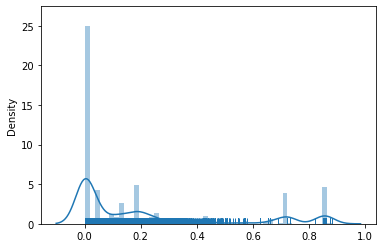

In [57]:
sns.distplot(cluster.outlier_scores_[np.isfinite(cluster.outlier_scores_)], rug=True)

<AxesSubplot:ylabel='$\\lambda$ value'>

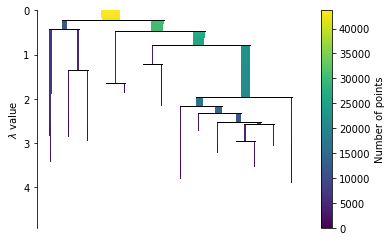

In [28]:
cluster.condensed_tree_.plot()

<AxesSubplot:ylabel='$\\lambda$ value'>

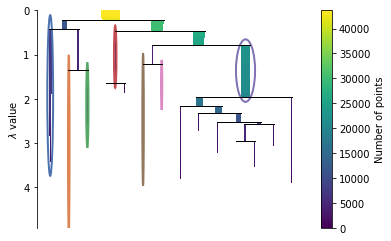

In [29]:
cluster.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette('deep', 8))

# Teste variando o parâmetro do UMAP n_components (dimensão do espaço final)

n_components=4

min_cluster_size=1000

min_samples=15

<AxesSubplot:ylabel='$\\lambda$ value'>

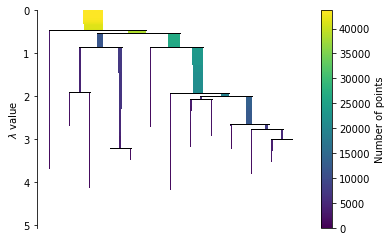

In [39]:
reducer = umap.UMAP(n_components=4)
embedding = reducer.fit_transform(dados_dim65)
cluster = hdbscan.HDBSCAN(min_cluster_size=1000, min_samples=15, gen_min_span_tree=True)
cluster.fit(embedding)
cluster.condensed_tree_.plot()

<AxesSubplot:ylabel='$\\lambda$ value'>

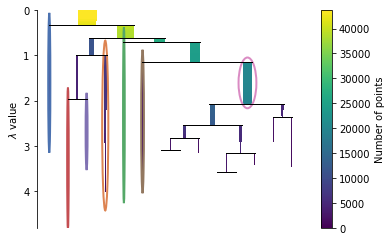

In [19]:
cluster.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette('deep', 8))

n_components=6

min_cluster_size=1000

min_samples=15

<AxesSubplot:ylabel='$\\lambda$ value'>

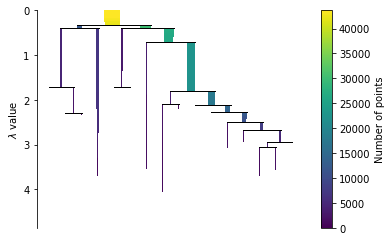

In [16]:
reducer = umap.UMAP(n_components=6)
embedding = reducer.fit_transform(dados_dim65)
cluster = hdbscan.HDBSCAN(min_cluster_size=1000, min_samples=15, gen_min_span_tree=True)
cluster.fit(embedding)
cluster.condensed_tree_.plot()

<AxesSubplot:ylabel='$\\lambda$ value'>

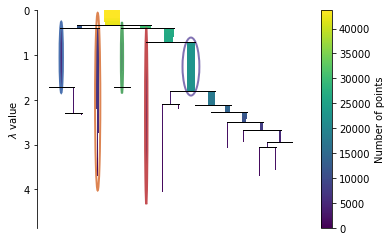

In [17]:
cluster.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette('deep', 8))

n_components=8

min_cluster_size=1000

min_samples=15

<AxesSubplot:ylabel='$\\lambda$ value'>

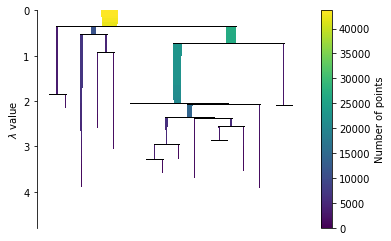

In [23]:
reducer = umap.UMAP(n_components=8)
embedding = reducer.fit_transform(dados_dim65)
cluster = hdbscan.HDBSCAN(min_cluster_size=1000, min_samples=15, gen_min_span_tree=True)
cluster.fit(embedding)
cluster.condensed_tree_.plot()

<AxesSubplot:ylabel='$\\lambda$ value'>

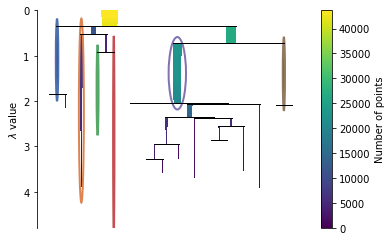

In [24]:
cluster.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette('deep', 8))

n_components=20

min_cluster_size=1000

min_samples=15

<AxesSubplot:ylabel='$\\lambda$ value'>

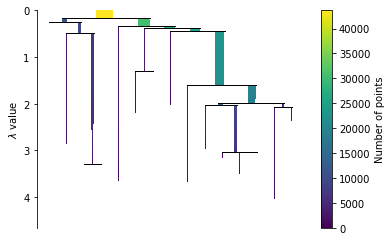

In [30]:
reducer = umap.UMAP(n_components=20)
embedding = reducer.fit_transform(dados_dim65)
cluster = hdbscan.HDBSCAN(min_cluster_size=1000, min_samples=15, gen_min_span_tree=True)
cluster.fit(embedding)
cluster.condensed_tree_.plot()

<AxesSubplot:ylabel='$\\lambda$ value'>

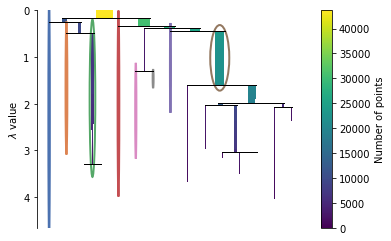

In [31]:
cluster.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette('deep', 8))

n_components=40

min_cluster_size=1000

min_samples=15

<AxesSubplot:ylabel='$\\lambda$ value'>

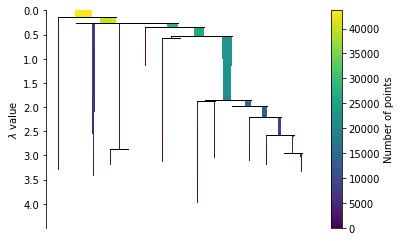

In [33]:
reducer = umap.UMAP(n_components=40)
embedding = reducer.fit_transform(dados_dim65)
cluster = hdbscan.HDBSCAN(min_cluster_size=1000, min_samples=15, gen_min_span_tree=True)
cluster.fit(embedding)
cluster.condensed_tree_.plot()

<AxesSubplot:ylabel='$\\lambda$ value'>

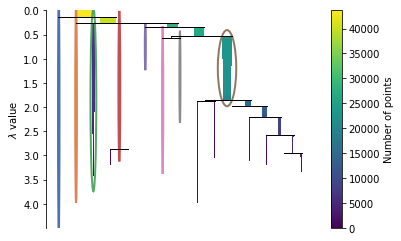

In [34]:
cluster.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette('deep', 8))

n_components=50

min_cluster_size=1000

min_samples=15

<AxesSubplot:ylabel='$\\lambda$ value'>

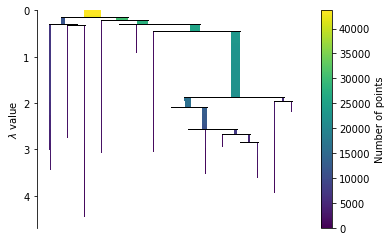

In [37]:
reducer = umap.UMAP(n_components=50)
embedding = reducer.fit_transform(dados_dim65)
cluster = hdbscan.HDBSCAN(min_cluster_size=1000, min_samples=15, gen_min_span_tree=True)
cluster.fit(embedding)
cluster.condensed_tree_.plot()

<AxesSubplot:ylabel='$\\lambda$ value'>

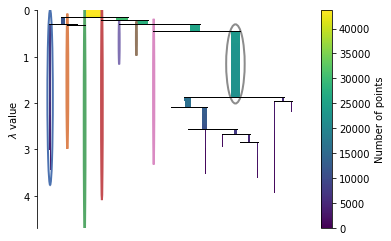

In [38]:
cluster.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette('deep', 8))

n_components=60

min_cluster_size=1000

min_samples=15

<AxesSubplot:ylabel='$\\lambda$ value'>

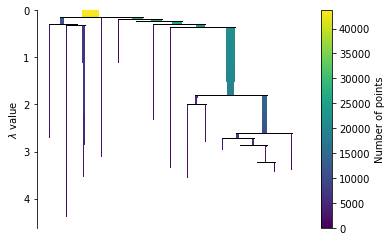

In [35]:
reducer = umap.UMAP(n_components=60)
embedding = reducer.fit_transform(dados_dim65)
cluster = hdbscan.HDBSCAN(min_cluster_size=1000, min_samples=15, gen_min_span_tree=True)
cluster.fit(embedding)
cluster.condensed_tree_.plot()

<AxesSubplot:ylabel='$\\lambda$ value'>

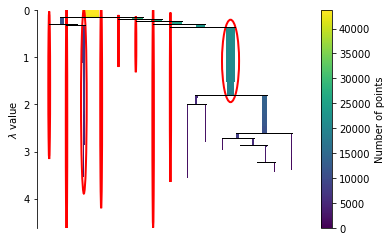

In [36]:
cluster.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette('deep', 8))

# Teste variando os parâmetros do HDBSCAN min_cluster_size

n_components=10

min_cluster_size=2000

min_samples=15

<AxesSubplot:ylabel='$\\lambda$ value'>

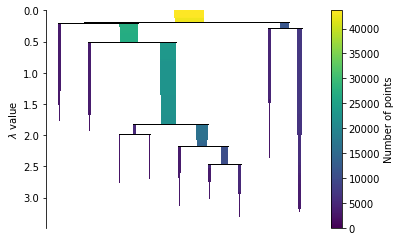

In [42]:
reducer = umap.UMAP(n_components=10)
embedding = reducer.fit_transform(dados_dim65)
cluster = hdbscan.HDBSCAN(min_cluster_size=2000, min_samples=15, gen_min_span_tree=True)
cluster.fit(embedding)
cluster.condensed_tree_.plot()

<AxesSubplot:ylabel='$\\lambda$ value'>

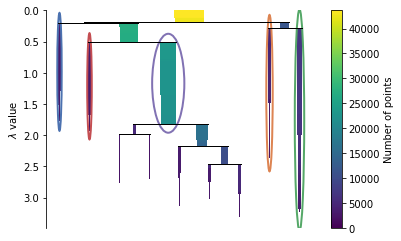

In [43]:
cluster.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette('deep', 8))

n_components=60

min_cluster_size=3000

min_samples=15

<AxesSubplot:ylabel='$\\lambda$ value'>

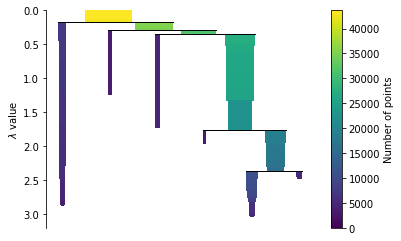

In [45]:
reducer = umap.UMAP(n_components=10)
embedding = reducer.fit_transform(dados_dim65)
cluster = hdbscan.HDBSCAN(min_cluster_size=3000, min_samples=15, gen_min_span_tree=True)
cluster.fit(embedding)
cluster.condensed_tree_.plot()

<AxesSubplot:ylabel='$\\lambda$ value'>

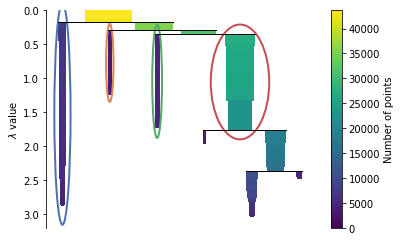

In [46]:
cluster.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette('deep', 8))

n_components=60

min_cluster_size=4000

min_samples=15

<AxesSubplot:ylabel='$\\lambda$ value'>

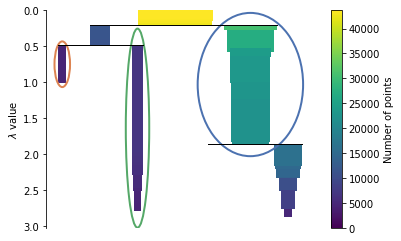

In [51]:
reducer = umap.UMAP(n_components=10)
embedding = reducer.fit_transform(dados_dim65)
cluster = hdbscan.HDBSCAN(min_cluster_size=4000, min_samples=15, gen_min_span_tree=True)
cluster.fit(embedding)
cluster.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette('deep', 8))

n_components=60

min_cluster_size=1500

min_samples=15

<AxesSubplot:ylabel='$\\lambda$ value'>

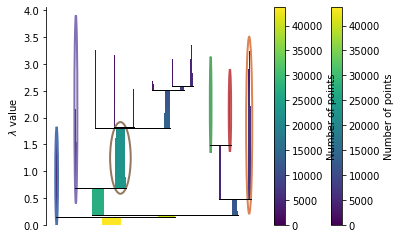

In [49]:
reducer = umap.UMAP(n_components=10)
embedding = reducer.fit_transform(dados_dim65)
cluster = hdbscan.HDBSCAN(min_cluster_size=1500, min_samples=15, gen_min_span_tree=True)
cluster.fit(embedding)
cluster.condensed_tree_.plot()
cluster.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette('deep', 8))

n_components=60

min_cluster_size=2500

min_samples=15

<AxesSubplot:ylabel='$\\lambda$ value'>

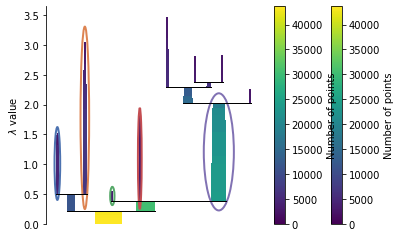

In [50]:
reducer = umap.UMAP(n_components=10)
embedding = reducer.fit_transform(dados_dim65)
cluster = hdbscan.HDBSCAN(min_cluster_size=2500, min_samples=15, gen_min_span_tree=True)
cluster.fit(embedding)
cluster.condensed_tree_.plot()
cluster.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette('deep', 8))